## **Overview: Exploring Drivers of Medical Costs**

**Overview**

In [ ]:
data source = https://gist.github.com/meperezcuello/82a9f1c1c473d6585e750ad2e3c05a41#file-medical_cost-csv

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
# reading in the data and returning the first 5 rows
data = pd.read_csv("/content/Medical_Cost.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**columns description**

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

## ***General Trends***

In [ ]:
# using 'describe' to get statistical overview of data
data.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


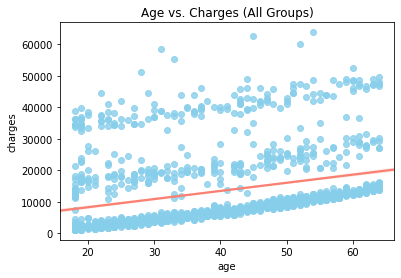

In [6]:
# exploring relationship between age and charges
ax = sn.regplot(x='age', y='charges', data=data, ci=68, truncate=False, scatter_kws={"color": "skyblue"}, line_kws={"color": "salmon"}).set_title("Charges vs. Age (All Groups)")

Text(0.5, 1.0, 'Charge Distribution')

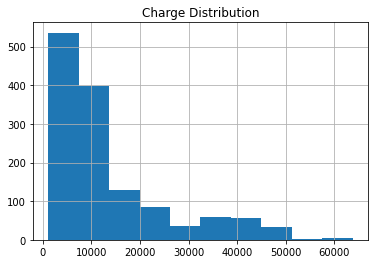

In [7]:
# distribution of charges
data.charges.hist().set_title("Charge Distribution")

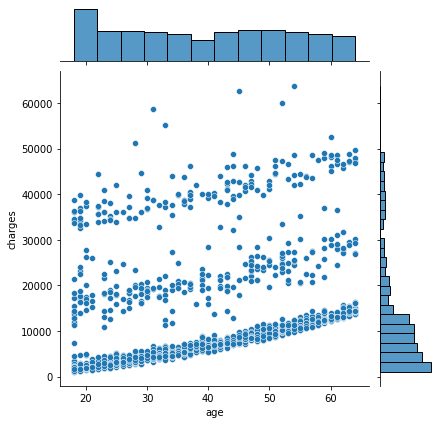

In [9]:
# LINEAR REGRESSION WITH MARGINAL DISTRIBUTION
margDist = sn.jointplot(x='age', y='charges', data=data)

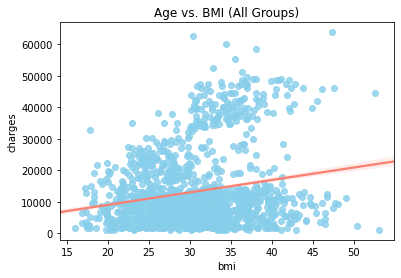

In [10]:
# exploring relationship between age and charges
ax = sn.regplot(x='bmi', y='charges', data=data, y_jitter=True, ci=68, truncate=False, scatter_kws={"color": "skyblue"}, line_kws={"color": "salmon"}).set_title("Age vs. BMI (All Groups)")

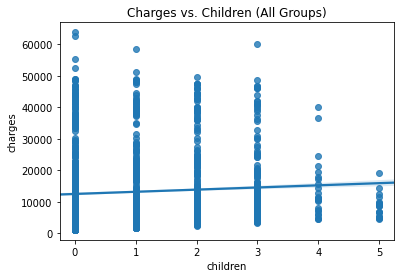

In [11]:
# exploring relationship between age and charges
ax = sn.regplot(x='children', y='charges', data=data, ci=68, truncate=False).set_title("Charges vs. Children (All Groups)")

Text(0.5, 1.0, 'Region vs. Age Heatmap')

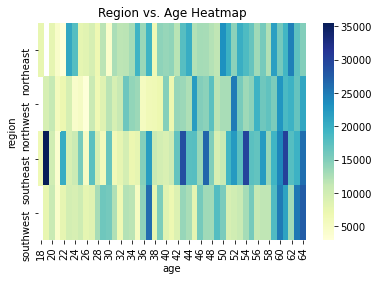

In [12]:
# creating a pivot table 
heatmap1_data = pd.pivot_table(data, values='charges', 
                     index=['region'], 
                     columns='age')
sn.heatmap(heatmap1_data, cmap="YlGnBu").set_title("Region and Age vs. Charge Heatmap")

# Trends in Upper Quartile of Health Costs

In [14]:
#creating a new dataframe that only includes rows in top quartile of cost
upperDf = data.copy()
upperDf = upperDf[upperDf['charges'] > 16639.912515]

# getting statistical overview of upper quartile
upperDf.describe()

,age,bmi,children,charges
count,335.000000,335.000000,335.000000,335.000000
mean,40.188060,31.308582,1.179104,31108.444687
std,13.817583,5.843001,1.164924,10595.023690
min,18.000000,17.765000,0.000000,16657.717450
25%,28.000000,27.100000,0.000000,21302.112325
50%,42.000000,30.900000,1.000000,28923.136920
75%,52.000000,35.530000,2.000000,39726.566025
max,64.000000,52.580000,5.000000,63770.428010


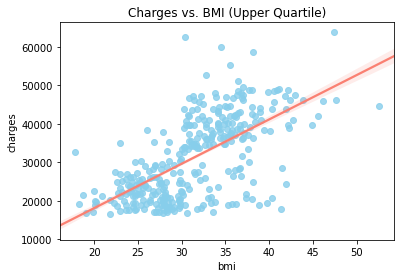

In [15]:
# bmi and charges for the upper quartile
ax = sn.regplot(x='bmi', y='charges', data=upperDf, y_jitter=True, ci=68, truncate=False, scatter_kws={"color": "skyblue"}, line_kws={"color": "salmon"}).set_title("Charges vs. BMI (Upper Quartile)")

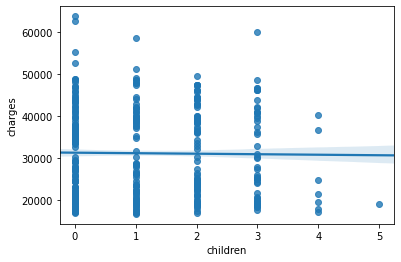

In [ ]:
ax = sn.regplot(x='children', y='charges', data=upperDf, ci=68, truncate=False)

# Trends by Sex

In [16]:
#creating new dataframes for female and male to investigate disparities between sex

# female data
femaleDf = data.copy()
femaleDf = femaleDf[femaleDf['sex'] == 'female']

# male data
maleDf = data.copy()
maleDf = maleDf[maleDf['sex'] == 'male']

In [ ]:
femaleDf.describe()

,age,bmi,children,charges
count,662.000000,662.000000,662.000000,662.000000
mean,39.503021,30.377749,1.074018,12569.578844
std,14.054223,6.046023,1.192115,11128.703801
min,18.000000,16.815000,0.000000,1607.510100
25%,27.000000,26.125000,0.000000,4885.158700
50%,40.000000,30.107500,1.000000,9412.962500
75%,51.750000,34.313750,2.000000,14454.691825
max,64.000000,48.070000,5.000000,63770.428010


In [ ]:
maleDf.describe()

,age,bmi,children,charges
count,676.000000,676.000000,676.000000,676.000000
mean,38.917160,30.943129,1.115385,13956.751178
std,14.050141,6.140435,1.218986,12971.025915
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.410000,0.000000,4619.134000
50%,39.000000,30.687500,1.000000,9369.615750
75%,51.000000,34.992500,2.000000,18989.590250
max,64.000000,53.130000,5.000000,62592.873090


Text(0.5, 1.0, 'Charge Distribution (Male)')

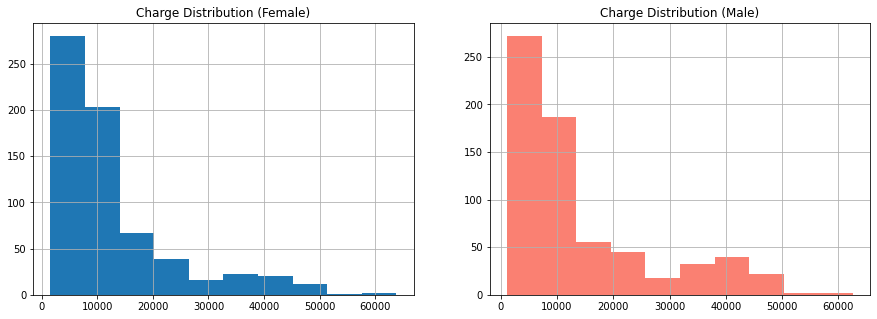

In [36]:
# female and male charge distributions
fig = plt.figure(figsize=[15,5])
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

femaleDf.charges.hist(ax=ax1).set_title("Charge Distribution (Female)")
maleDf.charges.hist(ax=ax2, color="salmon").set_title("Charge Distribution (Male)")

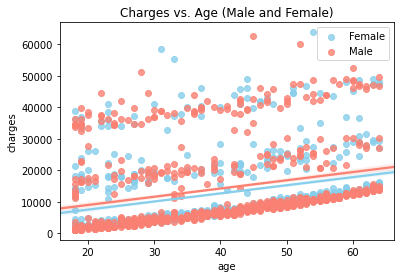

In [24]:
#one = femaleDf.plot.scatter(x="age", y="charges", color="red")
#two = maleDf.plot.scatter(x="age", y="charges", color="blue")

sn.regplot(x='age', y='charges', data=femaleDf,color="skyblue", ci=68, truncate=False, label="Female").set_title("Charges vs. Age (Male and Female)")
sn.regplot(x='age', y='charges', data=maleDf, ci=68, color="salmon", truncate=False, label="Male")
plt.legend()

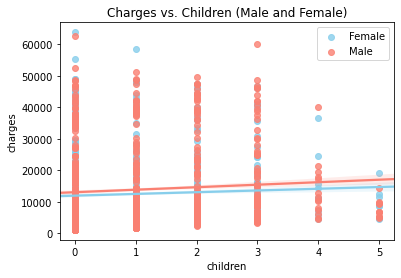

In [25]:
sn.regplot(x='children', y='charges', data=femaleDf, color="skyblue", ci=68, truncate=False, label="Female").set_title("Charges vs. Children (Male and Female)")
sn.regplot(x='children', y='charges', data=maleDf, color="salmon", ci=68, truncate=False, label="Male")
plt.legend()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


AttributeError: ignored

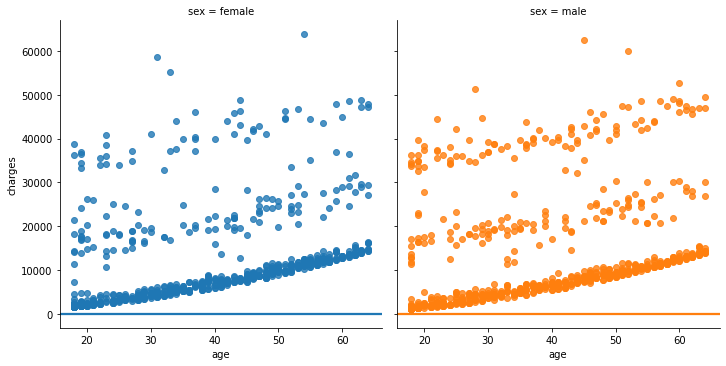

In [26]:
g = sn.lmplot(x="age", y="charges", col="sex", hue="sex", data=data, y_jitter=.02, logistic=True, truncate=False).set_title("Charges vs. Age (Male and Female")

# Trends for Smokers vs Non-Smokers

In [39]:
# smoker dataframe
smokerDf = data.copy()
smokerDf = smokerDf[smokerDf['smoker'] == 'yes']
smokerDf.head()

# non-smoker dataframe
nonSmokerDf = data.copy()
nonSmokerDf = nonSmokerDf[nonSmokerDf['smoker'] == 'no']

In [ ]:
# statistical overview for smoker group
smokerDf.describe()

,age,bmi,children,charges
count,274.000000,274.000000,274.000000,274.000000
mean,38.514599,30.708449,1.113139,32050.231832
std,13.923186,6.318644,1.157066,11541.547176
min,18.000000,17.195000,0.000000,12829.455100
25%,27.000000,26.083750,0.000000,20826.244213
50%,38.000000,30.447500,1.000000,34456.348450
75%,49.000000,35.200000,2.000000,41019.207275
max,64.000000,52.580000,5.000000,63770.428010


In [ ]:
# statistical overview for non-smoker group
nonSmokerDf.describe()

,age,bmi,children,charges
count,1064.000000,1064.000000,1064.000000,1064.000000
mean,39.385338,30.651795,1.090226,8434.268298
std,14.083410,6.043111,1.218136,5993.781819
min,18.000000,15.960000,0.000000,1121.873900
25%,26.750000,26.315000,0.000000,3986.438700
50%,40.000000,30.352500,1.000000,7345.405300
75%,52.000000,34.430000,2.000000,11362.887050
max,64.000000,53.130000,5.000000,36910.608030


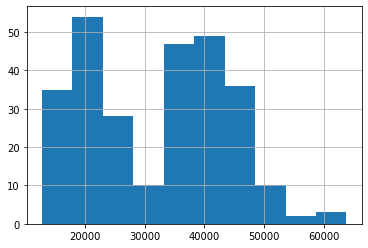

In [ ]:
smokerDf.charges.hist()

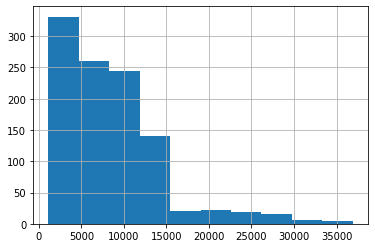

In [37]:
nonSmokerDf.charges.hist()

Text(0.5, 1.0, 'Charge Distribution (Non-Smoker)')

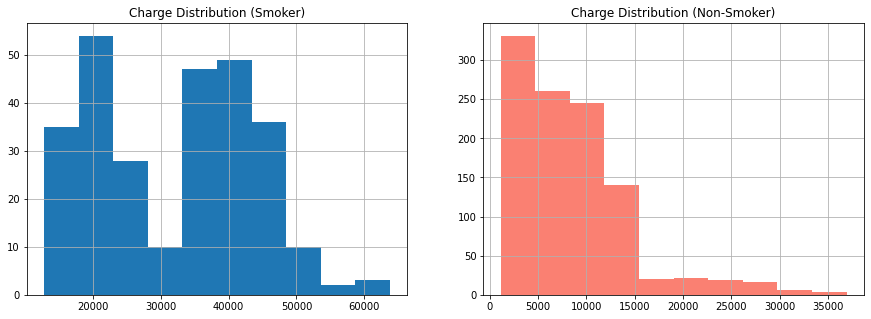

In [42]:
fig = plt.figure(figsize=[15,5])
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

smokerDf.charges.hist(ax=ax1).set_title("Charge Distribution (Smoker)")
nonSmokerDf.charges.hist(ax=ax2, color="salmon").set_title("Charge Distribution (Non-Smoker)")

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


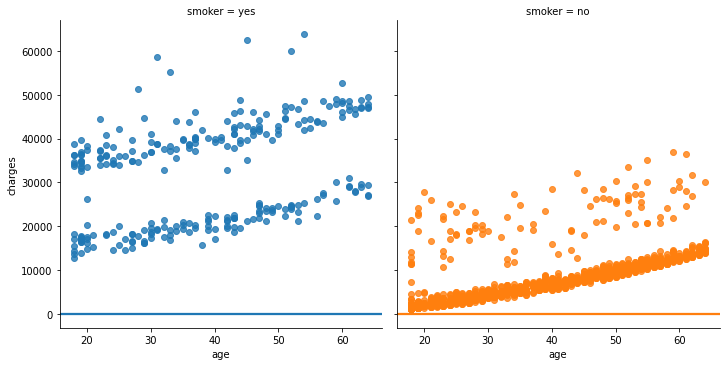

In [35]:
smokerVnonsmoker = sn.lmplot(x="age", y="charges", col="smoker", hue="smoker", data=data, y_jitter=.02, logistic=True, truncate=False)
#smokerVnonsmoker.set_title("Charges vs. Age (Smokers and Non-Smokers)")


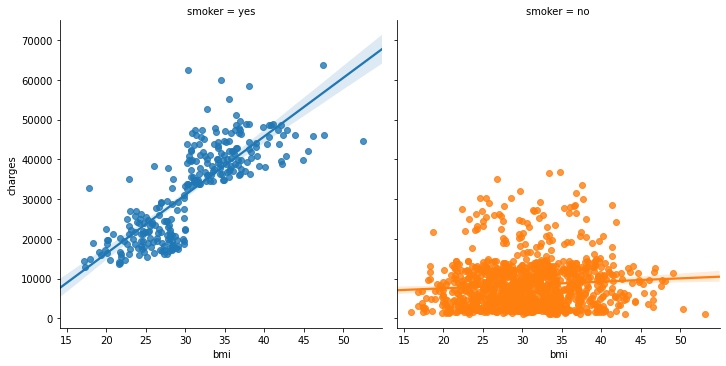

In [ ]:
smokerBMI= sn.lmplot(x="bmi", y="charges", col="smoker", hue="smoker", data=data, y_jitter=.02, truncate=False)
